# Math

In [ ]:
colab = False
local = True

In [ ]:
import pandas as pd
import datetime
from tools import *

if colab:
    FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/exoplanets_confirmed/resampled_files/RESAMPLED_EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
elif local:
    FILE_PATH = r'C:\Users\guisa\Google Drive\01 - Iniciação Científica\02 - Datasets\exoplanets_confirmed\resampled_files\RESAMPLED_EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
    
data = pd.read_csv(FILE_PATH)
time = data.DATE
flux = data.WHITEFLUX.to_numpy()

In [ ]:
viz.view_lightcurve(time, flux)

In [ ]:
try: 
  time = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f') for i in time]
except:
  time = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in time]

import julian

for i in range(len(time)):
  time[i] = julian.to_jd(time[i] + datetime.timedelta(hours=12), fmt='jd')

https://www.youtube.com/watch?v=JX8ZzQ3HLPo&ab_channel=PriyaHasan

# Lightkurve v2.0
https://docs.lightkurve.org/reference/api/lightkurve.LightCurve.html

http://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html

In [ ]:
!pip install lightkurve
!pip install julian
!pip install control

In [5]:
colab = True
local = False

In [29]:
import pandas as pd
import datetime
from tools import *

if colab:
    FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/exoplanets_confirmed/resampled_files/RESAMPLED_EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'
elif local:
    FILE_PATH = r'C:\Users\guisa\Google Drive\01 - Iniciação Científica\02 - Datasets\exoplanets_confirmed\resampled_files\RESAMPLED_EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'

data = pd.read_csv(FILE_PATH)
time = data.DATE
flux = data.WHITEFLUX.to_numpy()

viz.view_lightcurve(time, flux)

In [7]:
try: 
  time = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f') for i in time]
except:
  time = [datetime.datetime.strptime(i, '%Y-%m-%d %H:%M:%S') for i in time]

In [8]:
import julian

for i in range(len(time)):
  time[i] = julian.to_jd(time[i] + datetime.timedelta(hours=12), fmt='jd')

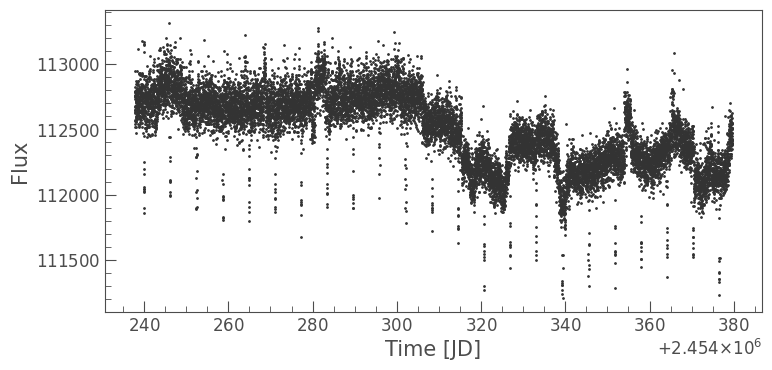

In [9]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

curve = lk.LightCurve(time=time, flux=flux)
curve.scatter()
plt.show()

## Normalized + Flatten

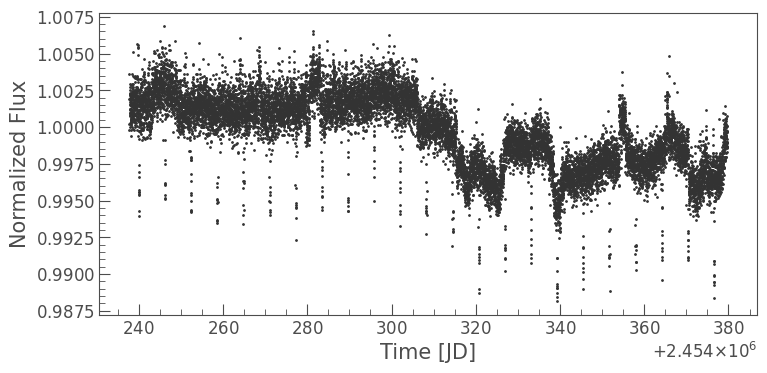

In [10]:
curve.normalize().scatter()
plt.show()

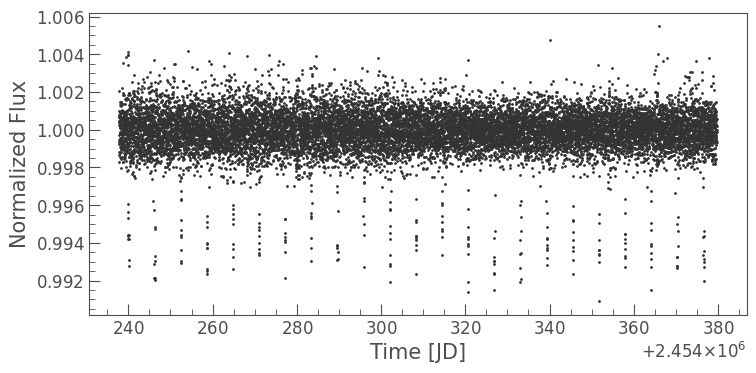

In [11]:
curve.normalize().flatten().scatter()
plt.show()

In [12]:
flux_normalized_flatted = curve.normalize().flatten().flux.to_value()
flux_normalized_flatted

array([0.99828101, 1.00038936, 1.00203869, ..., 0.99999941, 1.0002004 ,
       0.9993613 ])

## Periodogram

https://docs.astropy.org/en/stable/timeseries/bls.html

In [22]:
import numpy as np

# Create array of periods to search
period = np.linspace(1, 20, 10000)

# Create a BLSPeriodogram
bls = curve.normalize().flatten().to_periodogram('bls', period=period, frequency_factor=500)

viz.line_plot(
    bls.period.value, 
    bls.power.value, 
    title='BLS Periodogram', 
    x_axis='Period [d]', 
    y_axis='BLS Power'
    )

In [23]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
planet_b_period

<Quantity 6.20652065 d>

## Fold

In [18]:
curve_folded = curve.fold(period=planet_b_period, epoch_time=planet_b_t0)

viz.scatter_plot(
    curve_folded.phase.value, 
    curve_folded.flux, 
    title='Phase Folded Light Curve',
    x_axis='Phase [jD]',
    y_axis='Flux'
    )